In [379]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
 

In [380]:
df = pd.read_csv('BNBUSDT.csv');
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,28-03-2023,310.600,312.600,308.400,311.300,30497.237,29-03-2023,9.466806e+06,22156,15473.587,4.804293e+06,0
1,27-03-2023,328.600,329.800,305.900,310.600,578039.555,28-03-2023,1.827697e+08,355933,288712.460,9.126944e+07,0
2,26-03-2023,322.400,329.500,321.700,328.600,204700.193,27-03-2023,6.682742e+07,162414,112658.235,3.677966e+07,0
3,25-03-2023,322.100,324.900,319.000,322.400,317118.332,26-03-2023,1.022464e+08,203195,174392.846,5.622157e+07,0
4,24-03-2023,329.400,330.000,316.900,322.100,307030.002,25-03-2023,9.915187e+07,243287,156216.266,5.044289e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,25-03-2019,17.111,17.338,16.100,16.763,2775613.860,26-03-2019,4.647299e+07,95741,1315580.950,2.206312e+07,0
1496,24-03-2019,15.140,17.500,14.660,17.110,5285367.100,25-03-2019,8.647845e+07,143670,2902679.920,4.742954e+07,0
1497,23-03-2019,15.152,15.440,14.947,15.140,2632489.700,24-03-2019,3.984668e+07,39861,1467268.580,2.221503e+07,0
1498,22-03-2019,14.357,15.226,14.231,15.150,2695850.870,23-03-2019,4.006921e+07,55904,1561564.190,2.321590e+07,0


In [381]:
data = df['Close'][::-1];
val = data.reset_index(drop=True); 
val


0        14.351
1        15.150
2        15.140
3        17.110
4        16.763
         ...   
1495    322.100
1496    322.400
1497    328.600
1498    310.600
1499    311.300
Name: Close, Length: 1500, dtype: float64

In [382]:
# Create a date range starting from a specific date
start_date = '2019-03-19'
stop_date = '2023-03-28'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')



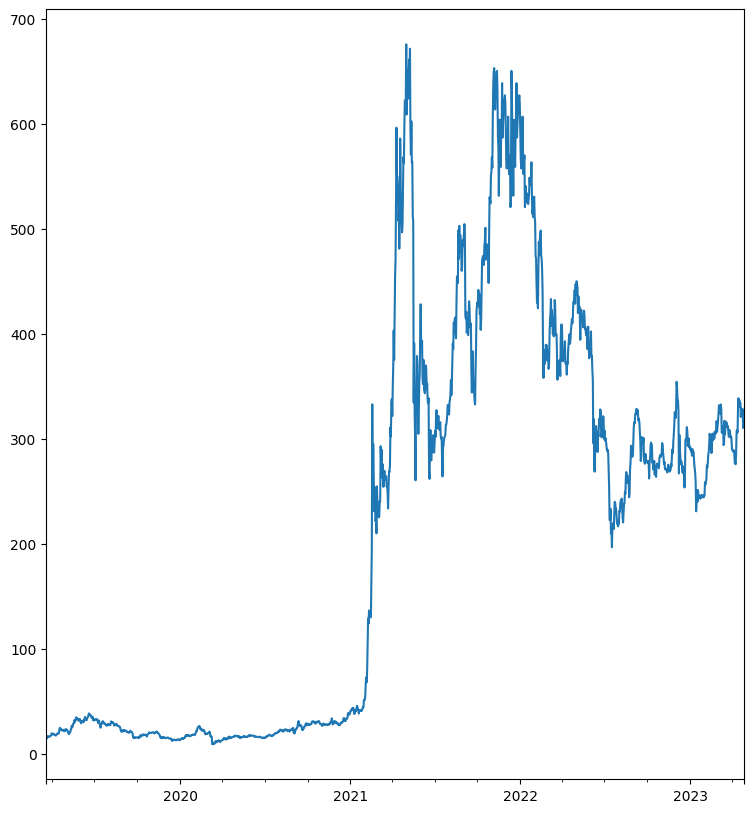

In [383]:
val.index = dates;
val.plot();

In [384]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])


In [385]:

adf_test(val.dropna());

1. ADF :  -1.5179319349806597
2. P-Value :  0.5246227547171224
3. Num Of Lags :  21


Vì P-value > 0.05, lớn hơn mức ý nghĩa, nên ta sẽ phải dùng phương pháp diff để biến chuỗi về chuỗi dừng.

In [386]:
adf_test(val.diff().dropna());

1. ADF :  -8.442196908685954
2. P-Value :  1.7509844500128964e-13
3. Num Of Lags :  20


Vì P-value < 0.05, nên giá trị của I = 1.

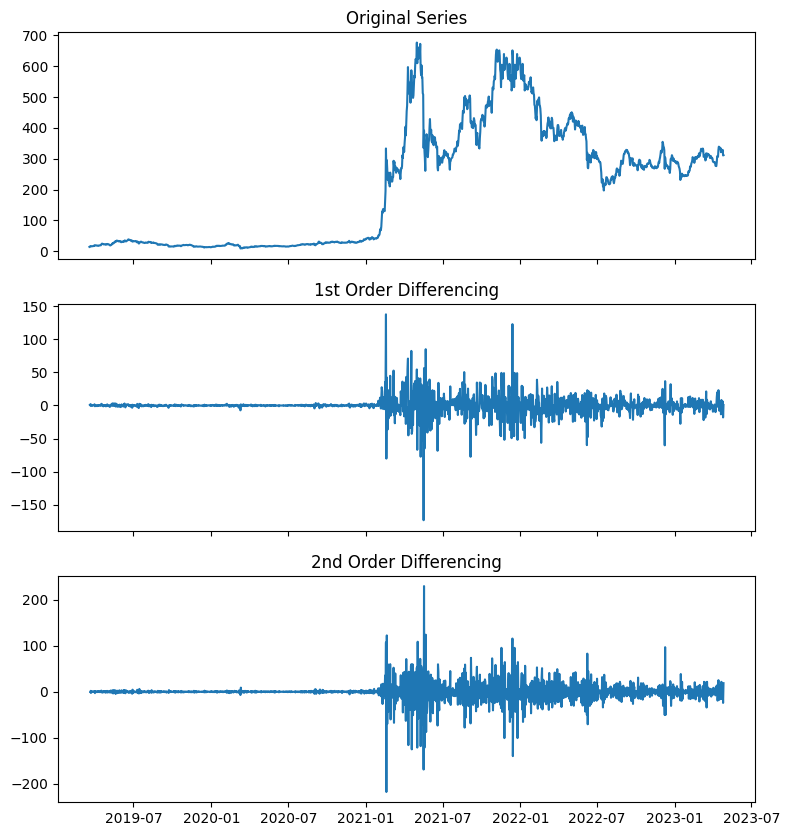

In [387]:
plt.rcParams.update({'figure.figsize':(9,10)})

# Original Series
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(val); 
axes[0].set_title('Original Series')
# 1st Differencing
axes[1].plot(val.diff()); 
axes[1].set_title('1st Order Differencing')

# 2nd Differencing
axes[2].plot(val.diff().diff()); 
axes[2].set_title('2nd Order Differencing')
plt.show()

<Figure size 1000x1000 with 0 Axes>

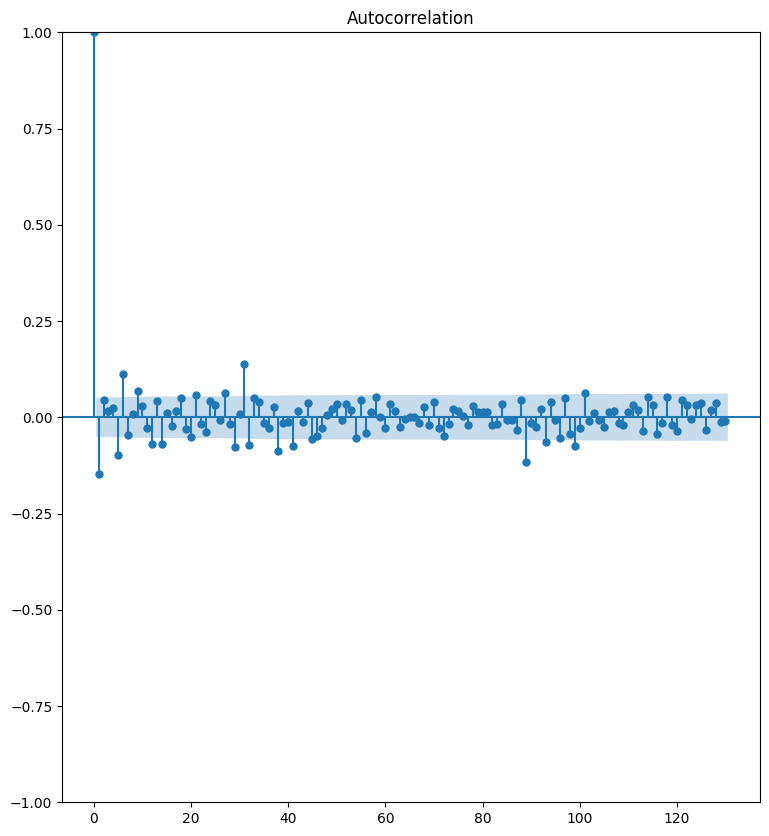

C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


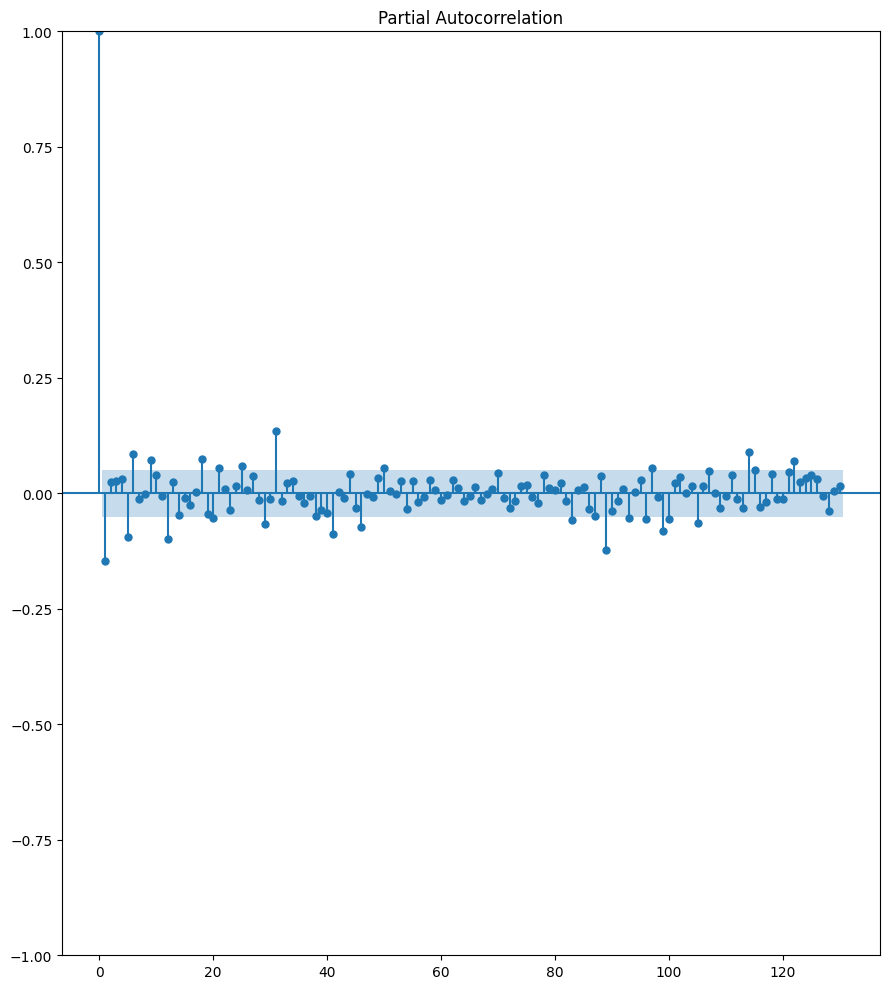

In [388]:
#Tính toán ACF và PACF 
plt.figure(figsize=[10, 10])

sm.graphics.tsa.plot_acf(val.diff().dropna(), lags=130)
plt.show();

sm.graphics.tsa.plot_pacf(val.diff().dropna(),lags=130);
plt.tight_layout();

plt.show();


In [389]:

# Split the data into training, valdiation, and test sets 7:1:2
print(val);
train_size = int(0.7 * len(val))
val_size = int(0.1 * len(val))
test_size = len(val) - train_size - val_size 

train_data = val[:train_size]
val_data = val[train_size:train_size+val_size]
test_data = val[train_size+val_size:]

2019-03-19     14.351
2019-03-20     15.150
2019-03-21     15.140
2019-03-22     17.110
2019-03-23     16.763
               ...   
2023-04-22    322.100
2023-04-23    322.400
2023-04-24    328.600
2023-04-25    310.600
2023-04-26    311.300
Freq: D, Name: Close, Length: 1500, dtype: float64


In [390]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(train_data, order=(3,1,2))

model_fit = model.fit();


C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [391]:
y_pred_val = model_fit.forecast(steps=val_size);
#set index for y_pred_val after train_data
y_pred_val.index = val_data.index

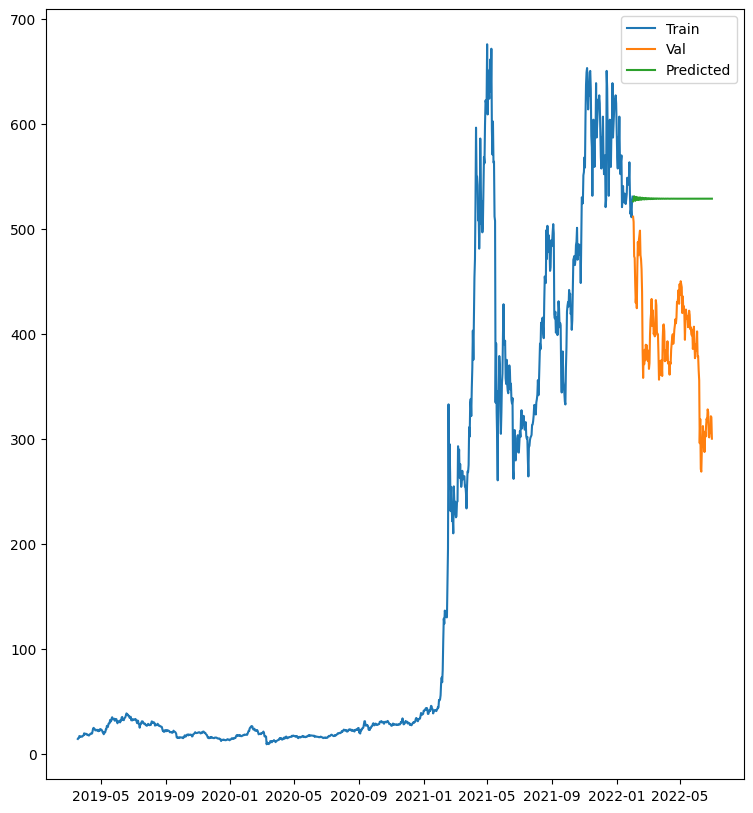

In [392]:
#plot train - val and y pred with label 
plt.plot(train_data, label='Train')
plt.plot(val_data, label='Val')
plt.plot(y_pred_val, label='Predicted')
plt.legend();


<h2>Loss function</h2>

In [393]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mse = np.mean((forecast - actual)**2)       # MSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'mse':mse})


In [394]:
forecast_accuracy(y_pred_val,val_data)

{'mape': 0.3725390681726256,
 'me': 136.86310332181557,
 'mae': 136.86310332181557,
 'mpe': 0.3725390681726256,
 'rmse': 145.60505264023016,
 'mse': 21200.831354364193}

In [395]:
#new model with train - val
# ARIMA Model
train_test_data = val[:int(0.9*len(val))]
model1 = sm.tsa.arima.ARIMA(train_test_data, order=(3,1,2))
model_fit1 = model1.fit();


C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [396]:
y_pred_test = model_fit1.forecast(steps=test_size);
y_pred_test.index = test_data.index;

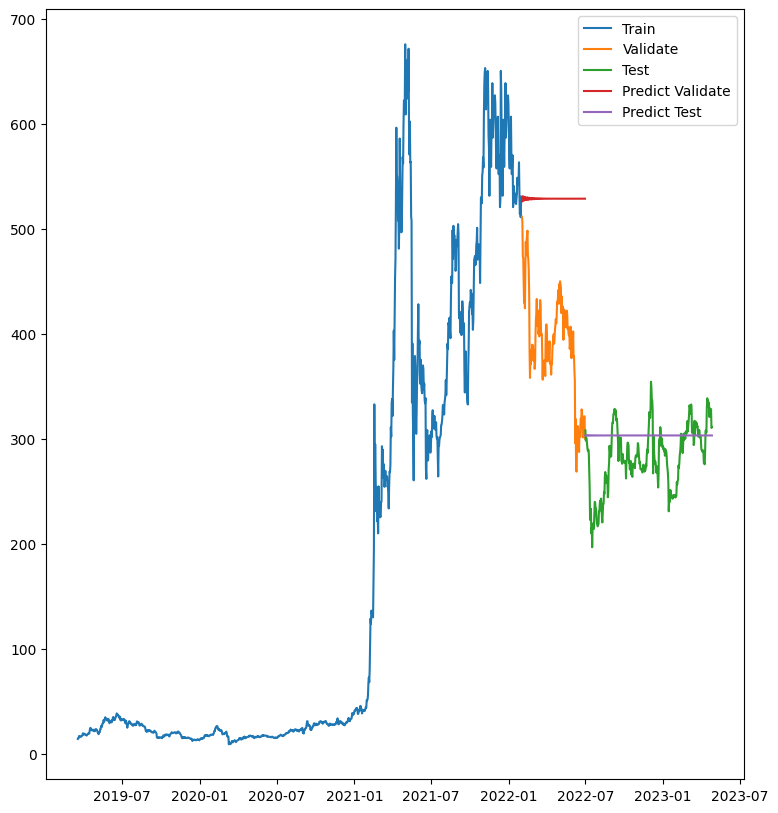

In [397]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(val_data, label='Validate')
plt.plot(test_data, label='Test')
plt.plot(y_pred_val, label='Predict Validate')
plt.plot(y_pred_test, label='Predict Test')
plt.legend();


Calculate accuracy of test

In [398]:
forecast_accuracy(y_pred_test,test_data)

{'mape': 0.11100982105264036,
 'me': 20.78919822839224,
 'mae': 28.697380300694736,
 'mpe': 0.08680510806577174,
 'rmse': 36.7708009691738,
 'mse': 1352.091803914593}

Predict next 30 days

In [399]:
#Train all data to predict next 30 days.
model1 = sm.tsa.arima.ARIMA(val, order=(3,1,2))
model_fit_all = model1.fit();
y_pred_next_30 = model_fit_all.forecast(steps=30);


C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


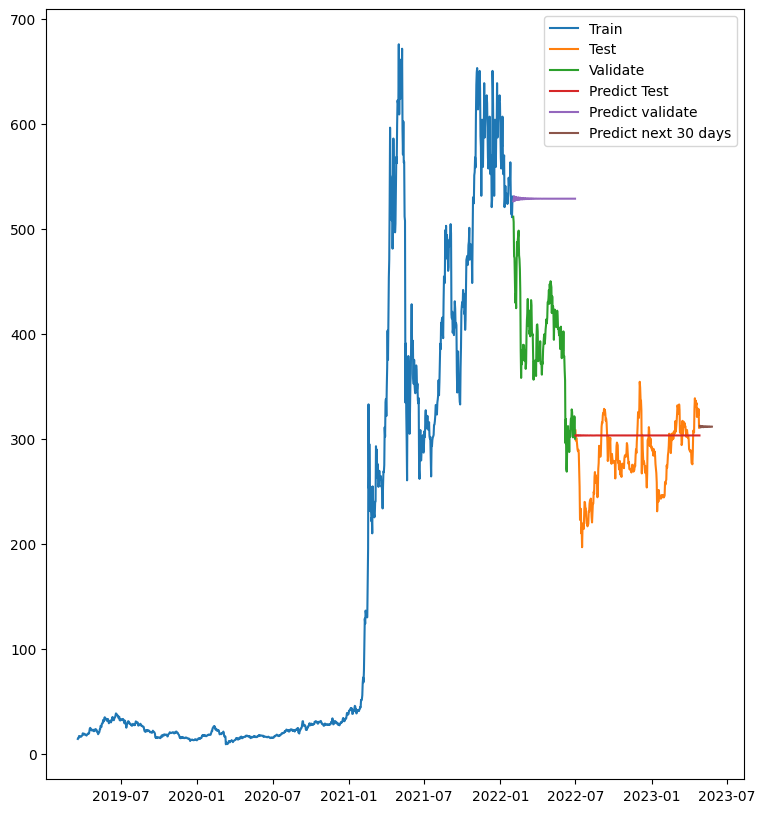

In [400]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(val_data, label='Validate')
plt.plot(y_pred_test, label='Predict Test')
plt.plot(y_pred_val, label='Predict validate')
plt.plot(y_pred_next_30, label= "Predict next 30 days");
plt.legend();


<h1>Random Walk Model</h1>

Make noise data

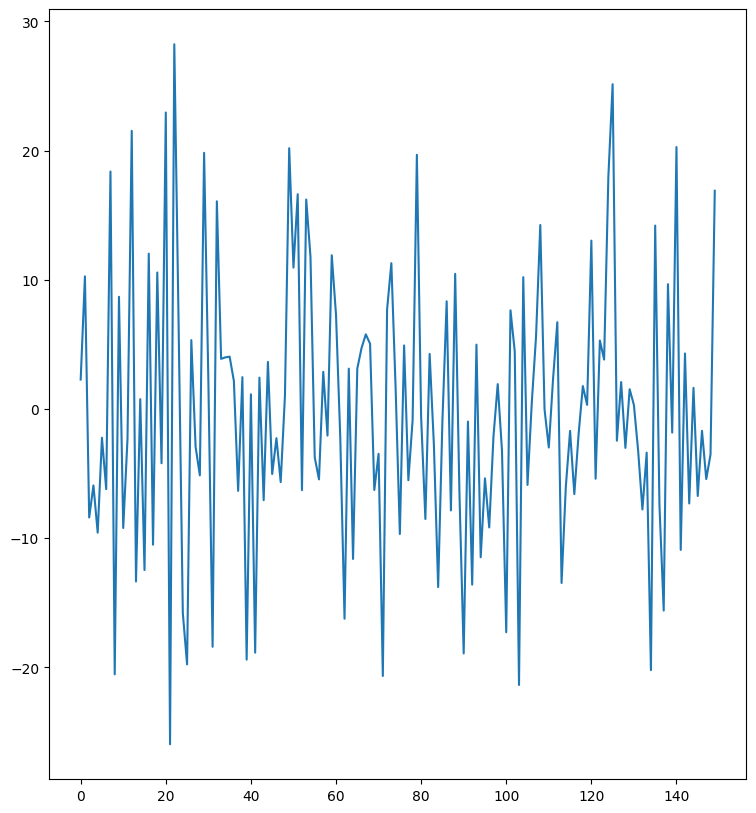

In [401]:
#create random array
def random_noise(n_size):
    #seed 25, loại random dữ liệu là 25, và các 
    #giá trị được random ra thì nó sẽ giữ nguyên mỗi khi chạy.
    np.random.seed(25)
    #random 1 mảng chứa 1 phần tử là 1 mảng có 300 phần tử.
    r = (np.random.randn(1, 1, n_size))*10
    r = r[0][0]
    return list(r);

r = random_noise(val_size);
plt.plot(r);

In [402]:
def rwalk(num, rr):
    rw = [num]
    for i in rr:
        rw.append(rw[-1]+i/3)
    return list(rw)

pr = rwalk(val_data[0], r);

Merge Random Walk & ARIMA with val_data and predict val using smoothing (moving average)

In [403]:
def smoothing_avg(list1,list2, n):
    list1 = list(list1);
    list2 = list(list2);
    avgList = [];
    for i in range(n):
        avgList.append((list1[i]+list2[i])/2);
    return pd.DataFrame(list(avgList));


In [404]:
arimar_pred_val = smoothing_avg(y_pred_val, pr, val_size);
arimar_pred_val.index = val_data.index;

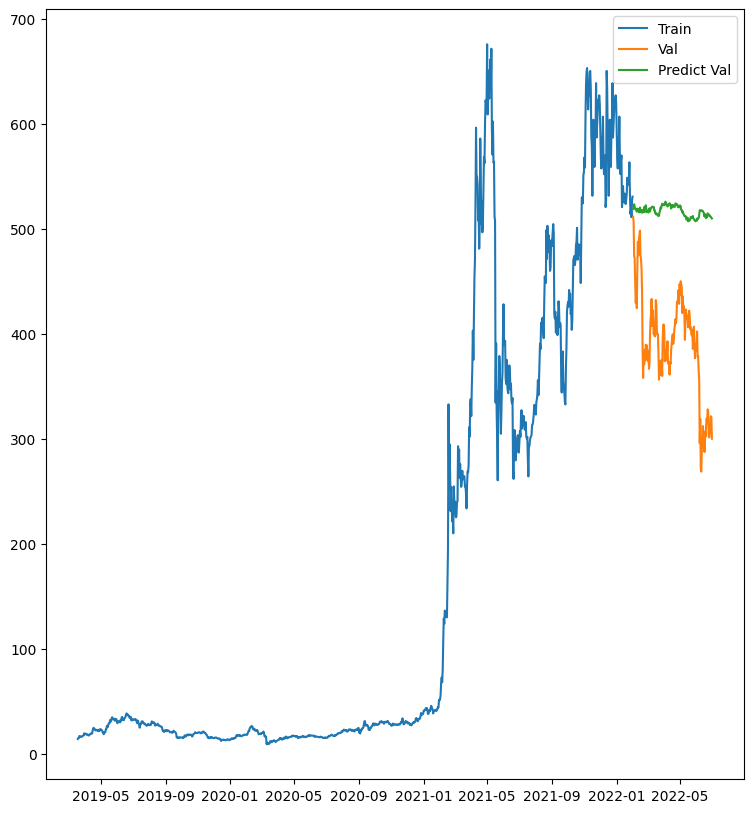

In [405]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(val_data, label='Val')
plt.plot(arimar_pred_val, label='Predict Val')
plt.legend();


Make random noise for test ->Create a random value with model random walk test
then smooth_avg to merge arima and random walk

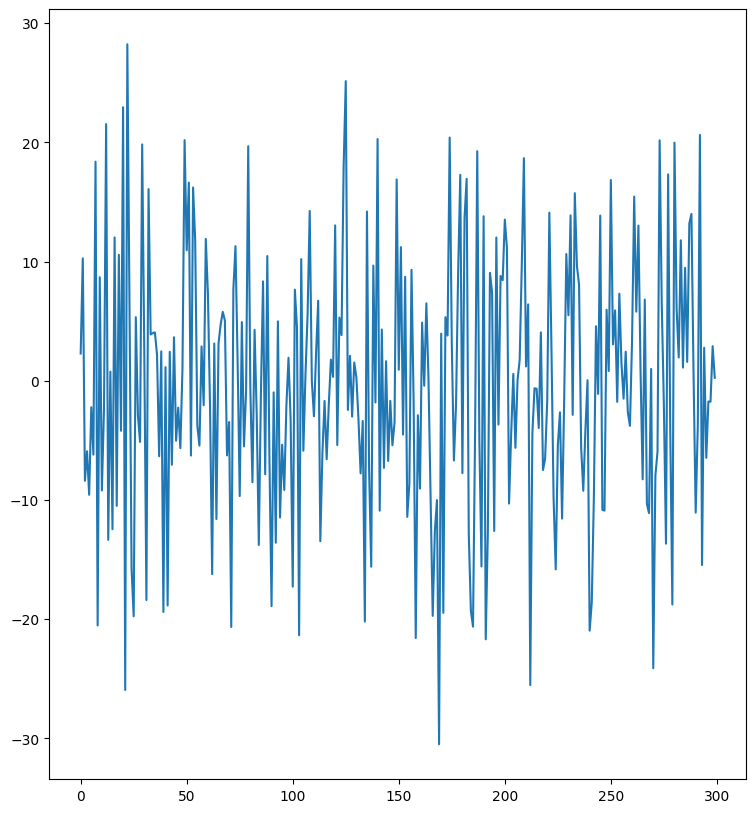

In [406]:
#tạo chuỗi random noise cho test
r_test = random_noise(test_size);
rw_test = rwalk(test_data[0],r_test)
arimar_pred_test = smoothing_avg(y_pred_test,rw_test,test_size);
arimar_pred_test.index = y_pred_test.index;
plt.plot(r_test)

Plot train+validate data and test predict data - test data

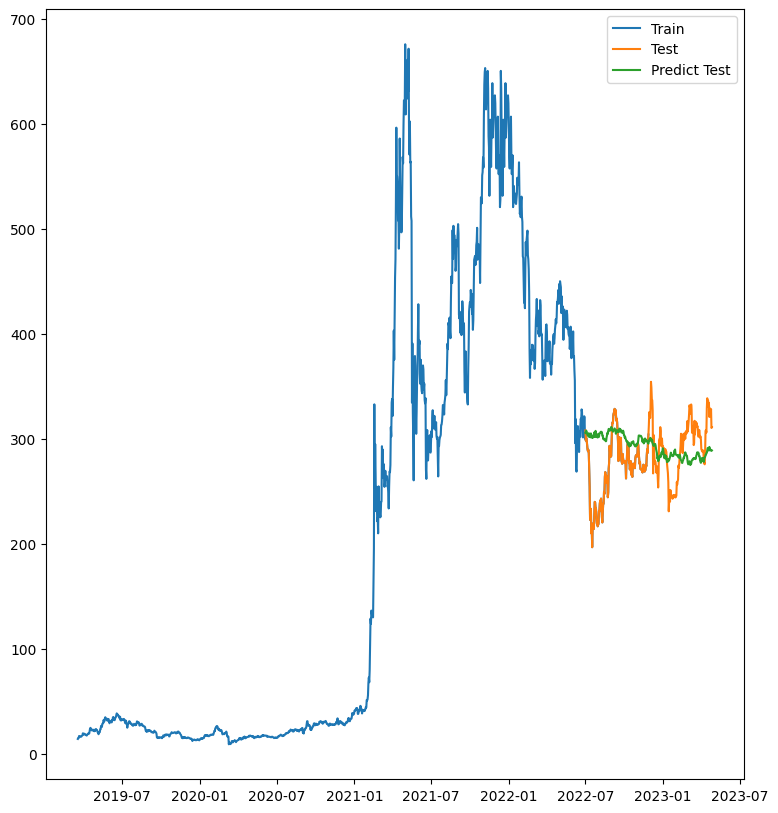

In [407]:
#plot train - test and y pred with label 

plt.plot(train_test_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(arimar_pred_test, label='Predict Test')
plt.legend();


Predict Next 30 days

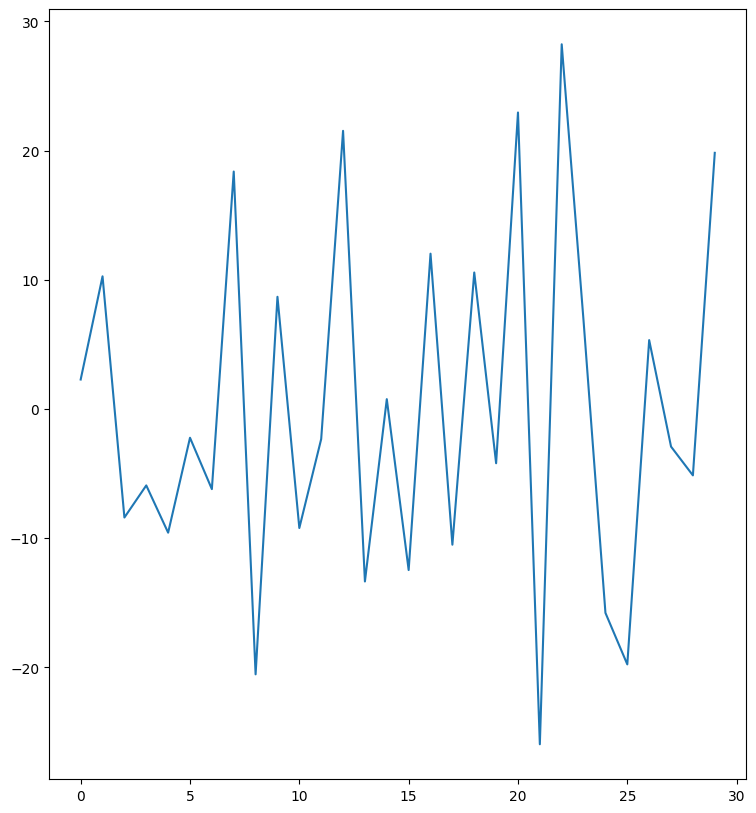

In [408]:
#tạo chuỗi random noise cho validate
r_next_30_days = random_noise(30);
rw_next_30_days  = rwalk(val[len(val)-1],r_next_30_days)
arimar_pred_next_30_days  = smoothing_avg(y_pred_next_30,rw_next_30_days,30);
arimar_pred_next_30_days.index = y_pred_next_30.index;
plt.plot(r_next_30_days)

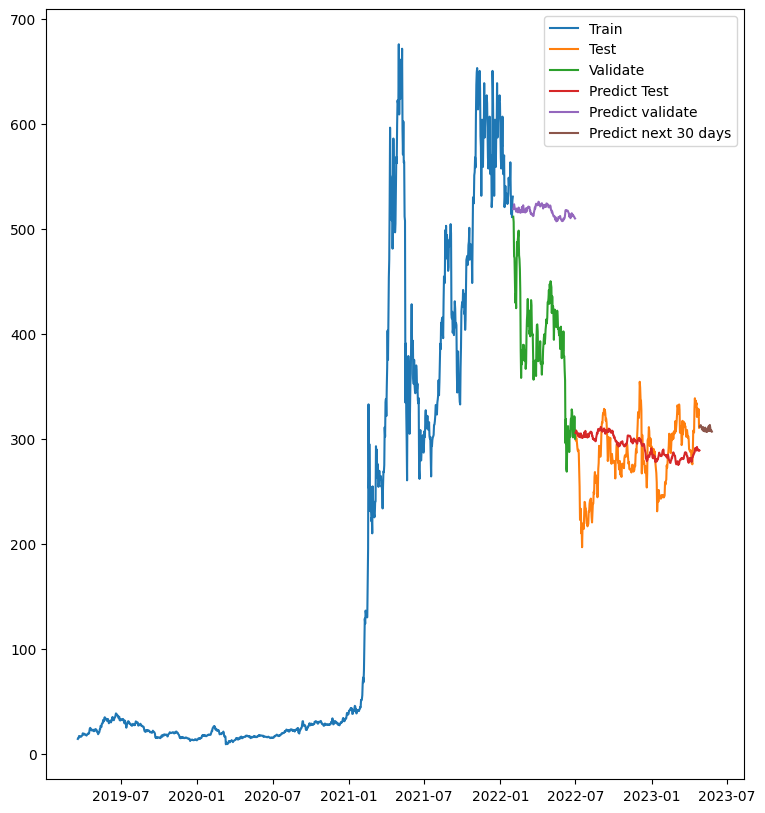

In [409]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(val_data, label='Validate')
plt.plot(arimar_pred_test, label='Predict Test')
plt.plot(arimar_pred_val, label='Predict validate')
plt.plot(arimar_pred_next_30_days, label= "Predict next 30 days");
plt.legend();

Calculate accuracy of evaluate error

In [410]:
print("Evalute error validate")
print(forecast_accuracy(arimar_pred_val[0],val_data))
print("Evalute error test")
print(forecast_accuracy(arimar_pred_test[0],test_data))


Evalute error validate
{'mape': 0.341044074410182, 'me': 124.86374155027744, 'mae': 124.86374155027744, 'mpe': 0.341044074410182, 'rmse': 134.09776564629925, 'mse': 17982.210751329792}
Evalute error test
{'mape': 0.10868828613143038, 'me': 11.043686093573248, 'mae': 28.723226646263843, 'mpe': 0.05293190296448795, 'rmse': 35.903557740733646, 'mse': 1289.065458442195}
